<a href="https://colab.research.google.com/github/omaralyousfi/omaralyousfi/blob/omar/Asian_vs_African_Elefants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/dataset/test'  # Update with your actual path
test_dir = '/content/drive/MyDrive/dataset/train'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/dataset/test/African')))
print(len(os.listdir('/content/drive/MyDrive/dataset/test/Asian')))
print(len(os.listdir('/content/drive/MyDrive/dataset/train/African')))
print(len(os.listdir('/content/drive/MyDrive/dataset/train/Asian')))

97
91
420
420


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (Asian vs African Elephants)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 151 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
5/5 [==============================] - 95s 18s/step - loss: 4.1733 - accuracy: 0.5298 - val_loss: 3.2802 - val_accuracy: 0.5135
Epoch 2/3
5/5 [==============================] - 59s 12s/step - loss: 2.3728 - accuracy: 0.5166 - val_loss: 2.6383 - val_accuracy: 0.4865
Epoch 3/3
5/5 [==============================] - 50s 10s/step - loss: 1.7592 - accuracy: 0.4768 - val_loss: 1.1035 - val_accuracy: 0.5135


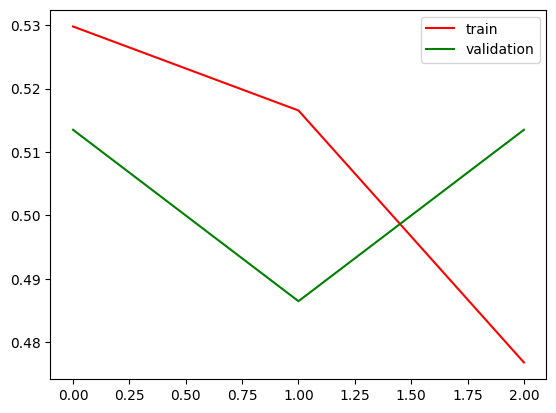

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

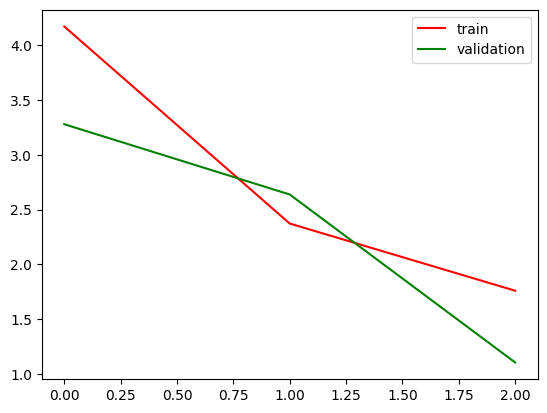

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 840 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

27/27 [==============================] - 216s 8s/step
[[0.18750687]
 [0.11519326]
 [0.08815203]
 [0.1183239 ]
 [0.11272791]
 [0.08476233]
 [0.1302274 ]
 [0.11738642]
 [0.11257609]
 [0.13249536]
 [0.07690085]
 [0.11028096]
 [0.12854987]
 [0.17014469]
 [0.1859226 ]
 [0.11853735]
 [0.1288291 ]
 [0.1054511 ]
 [0.15815872]
 [0.13068885]
 [0.1139967 ]
 [0.13401146]
 [0.10748582]
 [0.13734445]
 [0.05822465]
 [0.09262157]
 [0.10322225]
 [0.10538969]
 [0.09463856]
 [0.08403081]
 [0.11741439]
 [0.11544616]
 [0.118178  ]
 [0.09069188]
 [0.11153229]
 [0.13613693]
 [0.12193406]
 [0.05235954]
 [0.17164534]
 [0.09001231]
 [0.1852232 ]
 [0.05007781]
 [0.13506414]
 [0.1444508 ]
 [0.08379301]
 [0.0756226 ]
 [0.03471166]
 [0.07163523]
 [0.12498677]
 [0.09219263]
 [0.09581214]
 [0.10599235]
 [0.10907051]
 [0.09866472]
 [0.10794814]
 [0.09703269]
 [0.14201425]
 [0.10338508]
 [0.09359697]
 [0.12987612]
 [0.08435339]
 [0.15917733]
 [0.10337737]
 [0.09944168]
 [0.10642686]
 [0.09600418]
 [0.0934024 ]
 [0.1181

In [ ]:
len(predictions)

840

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[419   1]
 [420   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       420
           1       0.00      0.00      0.00       420

    accuracy                           0.50       840
   macro avg       0.25      0.50      0.33       840
weighted avg       0.25      0.50      0.33       840

